# k Nearest Neighbors Algorithm
### In this tutorial, we would be going through the basics of K Nearest Neighbors algorithm. 

## Importing necessary libraries

In [90]:
import pandas as pd  #For manipulating dataset

In [2]:
df=pd.read_csv('diabetes.csv') #loading a diabetes dataset, we will use it to predict if a person has diabetes 

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
#Lot of Insulin values are zero which is a point of concern
round(df['Insulin'][df['Insulin']==0].count()/df['Insulin'].count(),3) 

0.487

In [91]:
#We will drop the Insulin as almost 50% of values in that column are zero
X=df.drop(['Insulin','Outcome'],axis=1)  #independent variables
y=df['Outcome']  #target variable

## Creating train and test datasets

In [92]:
from sklearn.model_selection import train_test_split  #for splitting data into train ad test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)   

## Scaling the features

In [93]:
'''Scaling the features.
Scaling is very important in kNN because it is a neighbor based algorithm and distances are calculated between data points. 
If they are not of the same scale, the model may perform poorly. '''

from sklearn.preprocessing import StandardScaler  
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## Finding the optimal value for k

In [98]:
#Finding the optimal value for k by trying out different values and checking accuracy 

from sklearn.neighbors import KNeighborsClassifier  #kNN classifier
from sklearn.metrics import accuracy_score  #To evaluate the model
acc=[]
for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    acc.append(accuracy_score(y_test,pred_i))

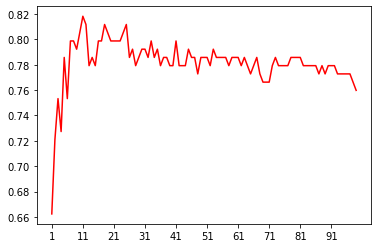

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,100),acc,'r-')
plt.xticks(range(1,100,10))
plt.show()

In [111]:
import numpy as np
acc.index(max(acc))+1  #k=11 gives the highest accuracy and after k=15, the accuracy score keeps declining

11

In [112]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [113]:
pred=knn.predict(X_test)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

[[88 12]
 [16 38]]


In [115]:
print("Accuracy Score: " , round(accuracy_score(y_test,pred)*100,3),"%")

Accuracy Score:  81.818 %
